In [1]:
include("ultrasoundgeneration.jl")

longcat (generic function with 1 method)

In [2]:
using PyCall
pushfirst!(PyVector(pyimport("sys")."path"), "")
ultrasoundgeneration = pyimport("ultrasoundgeneration")

names = readdir(ultrasoundgeneration.train_volumes_path)[1:40]

40-element Array{String,1}:
 "Pancreas_14.nrrd"
 "Pancreas_15.nrrd"
 "Pancreas_16.nrrd"
 "Pancreas_17.nrrd"
 "Pancreas_18.nrrd"
 "Pancreas_19.nrrd"
 "Pancreas_20.nrrd"
 "Pancreas_21.nrrd"
 "Pancreas_22.nrrd"
 "Pancreas_23.nrrd"
 "Pancreas_24.nrrd"
 "Pancreas_25.nrrd"
 "Pancreas_26.nrrd"
 ⋮                 
 "Pancreas_42.nrrd"
 "Pancreas_43.nrrd"
 "Pancreas_44.nrrd"
 "Pancreas_45.nrrd"
 "Pancreas_46.nrrd"
 "Pancreas_47.nrrd"
 "Pancreas_48.nrrd"
 "Pancreas_49.nrrd"
 "Pancreas_50.nrrd"
 "Pancreas_51.nrrd"
 "Pancreas_52.nrrd"
 "Pancreas_53.nrrd"

In [3]:
struct AnnotatedImage
    image::ItkImage
    annotation::Array{Array{Float64,1},1}
end


annotated_images = Array{AnnotatedImage, 1}()
for name = names
    print(name)
    image, annotation = ultrasoundgeneration.load_image_annotation(
        name, ultrasoundgeneration.train_volumes_path)
    jimage = ItkImage(image)
    push!(annotated_images, AnnotatedImage(jimage, annotation))
end

Pancreas_14.nrrdPancreas_15.nrrdPancreas_16.nrrdPancreas_17.nrrdPancreas_18.nrrdPancreas_19.nrrdPancreas_20.nrrdPancreas_21.nrrdPancreas_22.nrrdPancreas_23.nrrdPancreas_24.nrrdPancreas_25.nrrdPancreas_26.nrrdPancreas_27.nrrdPancreas_28.nrrdPancreas_29.nrrdPancreas_30.nrrdPancreas_31.nrrdPancreas_32.nrrdPancreas_33.nrrdPancreas_34.nrrdPancreas_35.nrrdPancreas_36.nrrdPancreas_37.nrrdPancreas_38.nrrdPancreas_39.nrrdPancreas_40.nrrdPancreas_41.nrrdPancreas_42.nrrdPancreas_43.nrrdPancreas_44.nrrdPancreas_45.nrrdPancreas_46.nrrdPancreas_47.nrrdPancreas_48.nrrdPancreas_49.nrrdPancreas_50.nrrdPancreas_51.nrrdPancreas_52.nrrdPancreas_53.nrrd

In [4]:
t_annotated_images = Array{AnnotatedImage, 1}()
for name = readdir(ultrasoundgeneration.test_volumes_path)
    print(name)
    image, annotation = ultrasoundgeneration.load_image_annotation(
        name, ultrasoundgeneration.test_volumes_path)
    jimage = ItkImage(image)
    push!(t_annotated_images, AnnotatedImage(jimage, annotation))
end

Pancreas_10.nrrdPancreas_11.nrrdPancreas_12.nrrdPancreas_13.nrrdPancreas_6.nrrdPancreas_7.nrrdPancreas_8.nrrdPancreas_9.nrrd

In [5]:
i = 0

0

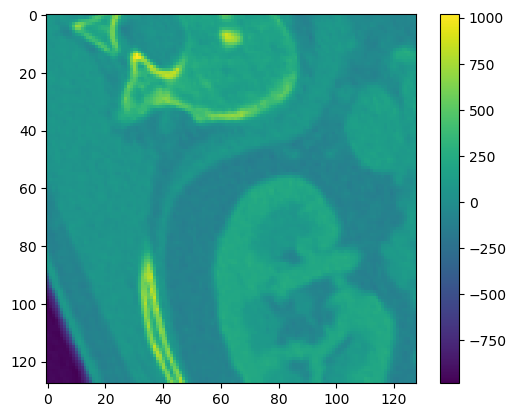

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa4811a59b0>

In [6]:
using PyPlot
i += 1
t = generate_sample(annotated_images[i].image, annotated_images[i].annotation)
plt.imshow(t["data"][1])
colorbar()


In [7]:
network_parallel = pyimport("train_network_parallel2")

2020-06-15 08:41:40.261367: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2020-06-15 08:41:40.266980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-15 08:41:40.267359: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: GeForce GTX 1080 major: 6 minor: 1 memoryClockRate(GHz): 1.7335
pciBusID: 0000:01:00.0
totalMemory: 7.93GiB freeMemory: 7.24GiB
2020-06-15 08:41:40.267367: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2020-06-15 08:41:41.197898: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-06-15 08:41:41.197930: I tensorflow/core/common_runtime/gpu/gpu_devi

PyObject <module 'train_network_parallel2' from '/media/data/hastings/ct-angledslice-align/train_network_parallel2.py'>

In [ ]:
@time tdata, tclasses = generate_data(
    [x.image for x in t_annotated_images],
    [x.annotation for x in t_annotated_images]
)
tdata = longcat(tdata)
tclasses = longcat(tclasses)
0

In [9]:
while true
    data, classes = generate_data(
        [x.image for x in annotated_images], 
        [x.annotation for x in annotated_images]
    )
    network_parallel.model.fit(
        longcat(data), longcat(classes), batch_size=64, 
        verbose=2, validation_data=(tdata, tclasses)
    )
end

iwhoop
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
lam

2020-06-15 08:41:55.252794: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2020-06-15 08:41:55.252824: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2020-06-15 08:41:55.252842: I tensorflow/core/common_runtime/gpu/gpu_device.cc:988]      0 
2020-06-15 08:41:55.252846: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1001] 0:   N 
2020-06-15 08:41:55.252968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 5683 MB memory) -> physical GPU (device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1)


Train on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 5.2698 - val_loss: 3.8784
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 4.7795 - val_loss: 4.7232
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 4.3460 - val_loss: 3.8584
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 4.1394 - val_loss: 4.0312
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 3.7687 - val_loss: 2.6299
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 3.5266 - val_loss: 1.8759
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 3.4264 - val_loss: 1.9603
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 3.1902 - val_loss: 1.6937
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 3.0706 - val_loss: 1.7946
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 10s - loss: 2.9758 - val_loss: 1.8501
iTrain on 26

InterruptException: InterruptException:

In [ ]:
while true
    data, classes = generate_data(
        [x.image for x in annotated_images], 
        [x.annotation for x in annotated_images]
    )
    network_parallel.model.fit(
        longcat(data), longcat(classes), batch_size=64, 
        verbose=2, validation_data=(tdata, tclasses)
    )
end

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.6076 - val_loss: 0.6659
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5705 - val_loss: 0.5193
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5795 - val_loss: 0.6110
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5823 - val_loss: 0.5452
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.6044 - val_loss: 0.6533
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5846 - val_loss: 1.1705
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.6440 - val_loss: 0.6799
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5862 - val_loss: 0.6848
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5863 - val_loss: 0.6652
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.6209 - val_loss: 0.8643
iTrain on 2680 sampl

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5176 - val_loss: 0.5341
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4971 - val_loss: 0.5129
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5710 - val_loss: 0.5167
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5942 - val_loss: 1.0537
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5945 - val_loss: 0.8516
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5747 - val_loss: 0.7494
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5628 - val_loss: 0.9722
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5563 - val_loss: 0.5036
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5485 - val_loss: 0.4967
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5487 - val_loss: 0.6635
iTrain on 2680 sampl

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4726 - val_loss: 0.7337
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5089 - val_loss: 0.7208
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5282 - val_loss: 0.6088
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5206 - val_loss: 0.5172
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5158 - val_loss: 0.5000
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5236 - val_loss: 0.4364
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5056 - val_loss: 0.5198
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5117 - val_loss: 0.5907
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5332 - val_loss: 0.5454
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5405 - val_loss: 0.6066
iTrain on 2680 sampl

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4892 - val_loss: 0.8457
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4752 - val_loss: 0.5694
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5007 - val_loss: 0.5297
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5065 - val_loss: 0.4731
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.5115 - val_loss: 0.6319
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4865 - val_loss: 0.4794
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4760 - val_loss: 0.4703
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4771 - val_loss: 0.6992
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4707 - val_loss: 0.4228
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4795 - val_loss: 0.8019
iTrain on 2680 sampl

iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4943 - val_loss: 0.6542
iTrain on 2680 samples, validate on 536 samples
Epoch 1/1
 - 9s - loss: 0.4531 - val_loss: 0.6685
i

In [10]:
using BenchmarkTools

In [27]:
network_parallel.model.compile(loss=network_parallel.keras.losses.mean_squared_error,
              optimizer=network_parallel.Adam(lr=0.0001))

In [8]:
@time [generate_sample(jimage, annotation) for _ = 1:7000]
0

  2.381736 seconds (5.91 M allocations: 2.022 GiB, 11.93% gc time)


0

In [93]:
@time data, classes = generate_data(
    [x.image for x in annotated_images], 
    [x.annotation for x in annotated_images]
)
0

i 23.120406 seconds (7.88 M allocations: 24.570 GiB, 34.92% gc time)


0

In [ ]:
network_parallel.model.fit(longcat(data), longcat(classes))

In [29]:
predictions = network_parallel.model.predict(tdata)
0

0

In [30]:
#network_parallel.model.save("models/juliatrain3")

In [31]:
tclasses[103]

0.2368783f0

In [32]:
i = 0

0

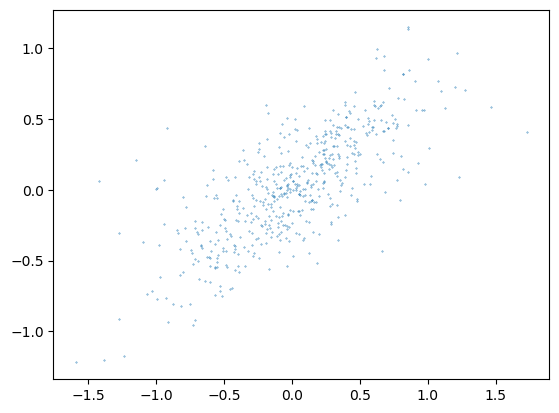

In [39]:
i += 1
scatter(tclasses[:, i], predictions[:, i], s= 0.1)
show()


In [35]:
imshow(data[1][:, :, 4])

UndefVarError: UndefVarError: data not defined

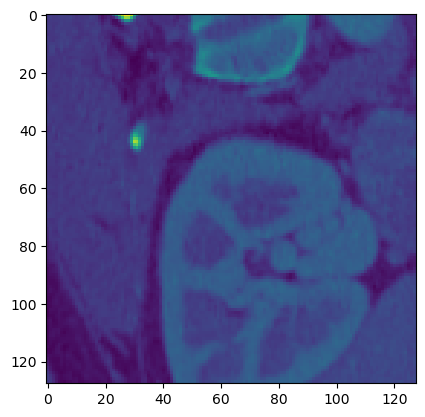

PyObject <matplotlib.image.AxesImage object at 0x0000001CA9F1F2E8>

In [57]:
imshow(data[1][:, :, 3])

In [74]:
@btime generate_sample(jimage, annotation)

  2.833 ms (821 allocations: 319.30 KiB)


Dict{String,Array{T,1} where T} with 2 entries:
  "classes" => Array{Float64,N} where N[[15.6977, 18.5604, -12.931], [0.995609 …
  "data"    => Array{Float32,2}[[-965.027 -917.938 … -65.8906 -33.3945; -958.46…

In [56]:
using Rotations

In [54]:
]add Rotations

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %                                  ]  14.8 % %>                      ]  44.3 %========================>                ]  59.2 % %>         ]  75.9 % [=====================================>   ]  90.8 % Resolving package versions...


┌ Warning: julia version requirement for package CuTextures not satisfied
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.3/Pkg/src/Operations.jl:229


 Installed Rmath_jll ────── v0.2.2+1
 Installed Compat ───────── v3.12.0
 Installed GeometryBasics ─ v0.2.12
  Updating `~/.julia/environments/v1.3/Project.toml`
  [6038ab10] + Rotations v0.13.0
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [34da2185] ↑ Compat v3.11.0 ⇒ v3.12.0
  [5c1252a2] ↑ GeometryBasics v0.2.11 ⇒ v0.2.12
  [f50d1b31] ↑ Rmath_jll v0.2.2+0 ⇒ v0.2.2+1


In [111]:
rs = [r.theta3 for r in RotXYZ{Float64}.(ultrasoundgeneration.random_small_rotation.(15 .+ zeros(10000)))]

10000-element Array{Float64,1}:
 -0.11712882502760963 
 -0.11541301583995608 
  0.03824323464930887 
  0.056124852505262515
 -0.1357983283115456  
 -0.17966577985790289 
  0.039119439173769824
 -0.08546579571463492 
 -0.15025349273506522 
 -0.01559086064624956 
 -0.07899328548394549 
  0.146646472330696   
 -0.1757698095878502  
  ⋮                   
 -0.07538076354920269 
 -0.11890278617523366 
  0.17140994397790468 
 -0.12012141734289403 
  0.16184184416994785 
  0.17944086657785407 
 -0.15887835700042424 
  0.008001680929756626
 -0.12406413007016365 
  0.11847794514811096 
  0.08987493329229881 
 -0.17734584028461295 

In [117]:
RotXYZ(24 .* randn(3)...)

3×3 RotXYZ{Float64} with indices SOneTo(3)×SOneTo(3)(4.77149, 28.5816, -7.59809):
 -0.241255  -0.922135  -0.302427 
  0.019273   0.307018  -0.951508 
  0.97027   -0.235385  -0.0562973

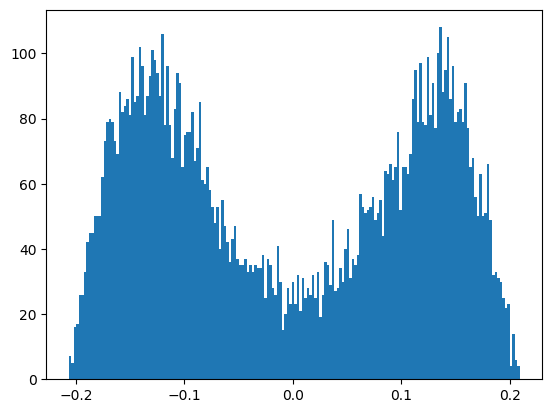

([7.0, 5.0, 16.0, 17.0, 26.0, 26.0, 33.0, 42.0, 45.0, 45.0  …  33.0, 31.0, 30.0, 25.0, 22.0, 23.0, 4.0, 14.0, 6.0, 4.0], [-0.2067479844648879, -0.20443913817672058, -0.20213029188855328, -0.19982144560038595, -0.19751259931221865, -0.19520375302405132, -0.192894906735884, -0.1905860604477167, -0.18827721415954937, -0.18596836787138205  …  0.1880647308117231, 0.1903735770998904, 0.19268242338805774, 0.19499126967622504, 0.19730011596439234, 0.1996089622525597, 0.201917808540727, 0.2042266548288943, 0.20653550111706165, 0.20884434740522895], PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f994c4dd160>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4d2ef0>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4dd6d8>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4dd9e8>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4ddcf8>, PyObject <matplotlib.patches.Rectangle object at 0x7f994c4ddfd0>, PyObject <matplotlib.patches.Rectangle object at 

In [112]:
hist(rs, bins=180)

In [120]:
 pi / 15 * 180 / pi

12.0

In [90]:
15 .+ zeros(10000)

10000-element Array{Float64,1}:
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
  ⋮  
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0
 15.0

In [39]:
import CuTextures

In [40]:
?CuTextures.unsafe_free!

No documentation found.

`CuTextures.unsafe_free!` is a `Function`.

```
# 2 methods for generic function "unsafe_free!":
[1] unsafe_free!(t::CuTextureArray) in CuTextures at /home/hastings/.julia/packages/CuTextures/VZ9IC/src/texturearray.jl:63
[2] unsafe_free!(t::CuTexture) in CuTextures at /home/hastings/.julia/packages/CuTextures/VZ9IC/src/texture.jl:111
```


In [14]:
?network_parallel.model.fit

Trains the model for a fixed number of epochs (iterations on a dataset).

    Arguments:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset or a dataset iterator. Should return a tuple
            of either `(inputs, targets)` or
            `(inputs, targets, sample_weights)`.
          - A generator or `keras.utils.Sequence` returning `(inputs, targets)`
            or `(inputs, targets, sample weights)`.
        y: Target data. Like the input data `x`,
          it could be either Numpy array(s) or TensorFlow tensor(s).
          It should be consistent with `x` (you cannot have Numpy inputs and
          tensor targets, or inverse